Imports

In [302]:
# Imports

import os
import requests
import json
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as alpaca
import alpaca_trade_api as tradeapi
from alpaca_trade_api import REST, TimeFrame


Tickers

In [303]:
# Set tickers

tickers = [
    "ARKK", 
    "ARKQ", 
    "AXP", 
    "FB", 
    "HD", 
    "JPM", 
    "MA", 
    "NLS", 
    #"TSLA", 
    "UAL", 
    #"UBER", 
    "VALE",
    "F",
    #"EOG",
    #"TWTR"
]

Connection

In [304]:
# Set the variables for the Alpaca API and secret keys

connection = REST()


Alpaca API

In [305]:
# Load the environment variables from the .env file

#load_dotenv()


In [306]:
# Set the variables for the Alpaca API and secret keys

#alpaca_api_key = os.getenv("ALPACA_API_KEY")
#alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca tradeapi.REST object

#connection = tradeapi.REST(
    #alpaca_api_key,
    #alpaca_secret_key,
    #api_version="v2")
    
    

Timeframe

In [307]:
timeframe = "1D"



start_date = pd.Timestamp("2019-1-1", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-1-31", tz="America/New_York").isoformat()


Get Barset

In [308]:
prices = connection.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df


prices.head()


ARKK                                        ARKQ  \
                            open     high      low    close  volume     open   
time                                                                           
2019-01-02 00:00:00-05:00  36.27  37.5728  36.2300  37.4096  233422  29.0900   
2019-01-03 00:00:00-05:00  37.00  37.1407  35.9100  36.1500  257150  29.3000   
2019-01-04 00:00:00-05:00  36.90  38.5603  36.8601  38.4100  317381  28.8663   
2019-01-07 00:00:00-05:00  38.67  40.3300  38.3900  40.1150  523842  29.6800   
2019-01-08 00:00:00-05:00  40.71  40.8300  39.3075  40.2500  465602  30.8800   

                                                             ...    UAL  \
                              high      low    close volume  ...   open   
time                                                         ...          
2019-01-02 00:00:00-05:00  29.7500  28.9200  29.5613  21085  ...  81.69   
2019-01-03 00:00:00-05:00  29.3000  28.4100  28.4200  12651  ...  83.26   
2019-01-04 00:00:00-05:00  29.7880  28.8662  29.7120   7813  ...  80.88   
2019-01-07 00:00:00-05:00  30.6499  29.6800  30.3676  10804  ...  82.57   
2019-01-08 00:00:00-05:00  31.0000  30.2500  30.7000  22148  ...  83.30   

                                                           VALE         \
                            high    low   close   volume   open   high   
time                                                                     
2019-01-02 00:00:00-05:00  84.25  81.41  84.200  2022162  12.94  13.47   
2019-01-03 00:00:00-05:00  83.26  78.38  80.050  4481003  13.36  13.38   
2019-01-04 00:00:00-05:00  83.95  80.77  82.570  2934405  13.35  14.09   
2019-01-07 00:00:00-05:00  83.92  81.45  83.360  2072577  14.23  14.28   
2019-01-08 00:00:00-05:00  84.62  81.89  82.395  2906523  13.94  14.15   

                                                     
                              low   close    volume  
time                                                 
2019-01-02 00:00:00-05:00  12.920  13.455  21344682  
2019-01-03 00:00:00-05:00  12.830  12.860  26357532  
2019-01-04 00:00:00-05:00  13.340  14.050  41085595  
2019-01-07 00:00:00-05:00  13.800  13.860  22250554  
2019-01-08 00:00:00-05:00  13.845  14.055  17548728  

[5 rows x 55 columns]

Close prices Function

In [309]:

def get_close_prices(ticker):
    prices=connection.get_barset(
    ticker, 
    timeframe, 
    start=start_date, 
    end=end_date,
    limit=1000
).df

    prices = prices.xs("close", level=1, axis="columns")

    return(pd.DataFrame(prices))
    
close_prices = get_close_prices(tickers)

close_prices
    

,ARKK,ARKQ,AXP,F,FB,HD,JPM,MA,NLS,UAL,VALE
time,,,,,,,,,,,
2019-01-02 00:00:00-05:00,37.4096,29.5613,95.530,7.8950,135.4100,172.210,99.1999,189.515,11.175,84.200,13.455
2019-01-03 00:00:00-05:00,36.1500,28.4200,93.520,7.8000,131.8902,168.920,97.3200,181.295,10.970,80.050,12.860
2019-01-04 00:00:00-05:00,38.4100,29.7120,97.610,8.0750,137.9400,173.480,100.6600,189.510,11.130,82.570,14.050
2019-01-07 00:00:00-05:00,40.1150,30.3676,98.240,8.2999,138.2300,176.979,100.8600,191.455,11.170,83.360,13.860
2019-01-08 00:00:00-05:00,40.2500,30.7000,98.625,8.3750,142.5843,177.790,100.4900,192.150,11.160,82.395,14.055
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10 00:00:00-05:00,84.6100,72.2500,173.730,23.8500,328.0900,387.440,167.2800,364.010,5.950,46.600,14.640
2022-01-11 00:00:00-05:00,86.9700,73.8700,175.380,24.3400,334.4500,386.700,167.4800,366.410,5.800,46.910,15.240
2022-01-12 00:00:00-05:00,84.5800,73.2900,174.590,24.4800,333.2600,389.510,168.4900,367.330,5.840,46.530,15.560


Price chart

<AxesSubplot:xlabel='time'>

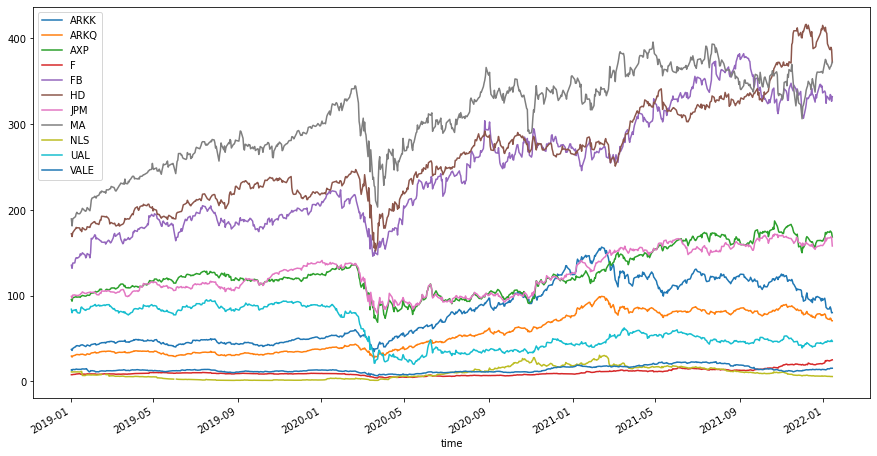

In [310]:
close_prices.plot(
    figsize=(15,8)
)

Returns

In [311]:
# Calculate the aggregate daily returns

returns = close_prices.pct_change().dropna()

returns


# Calculate the annualized average return data

returns_annualized = returns.mean() * 252

returns_annualized.sort_values()


UAL     0.024557
VALE    0.166174
JPM     0.215478
AXP     0.270817
MA      0.280313
HD      0.298033
NLS     0.310335
ARKK    0.330658
ARKQ    0.337217
FB      0.357725
F       0.476540
dtype: float64

Standard Deviation

In [312]:
# Calculate the standard deviation

std = returns.std()

std


# Calculate the annualized standard deviation (252 trading days)

std_annualized = (std * np.sqrt(252))

std_annualized.sort_values()


HD      0.295419
ARKQ    0.315349
MA      0.341975
FB      0.353826
JPM     0.354355
ARKK    0.397207
AXP     0.414946
F       0.438126
VALE    0.495762
UAL     0.657127
NLS     1.049508
dtype: float64

Sharpe Ratio

In [313]:
# Calculate the annualized Sharpe Ratios

sharpe_ratio = returns_annualized / std_annualized

sharpe_ratio.sort_values()


UAL     0.037370
NLS     0.295696
VALE    0.335189
JPM     0.608086
AXP     0.652657
MA      0.819688
ARKK    0.832457
HD      1.008848
FB      1.011019
ARKQ    1.069347
F       1.087679
dtype: float64